In [98]:
import numpy as np
from numpy import *
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.patches import Patch

In [99]:
import seaborn as sns
import cycler 
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MaxNLocator

In [100]:
#Reads the csv file containing rawdata
data = pd.read_csv("Lysate_002_p70_T7.csv")
#Prints first 5 rows of the dataframe
data.head(5) 

,Time(min),B4,D4,F4,H4,J4,L4,I10
0,0,50,47,51,95,93,99,23
1,2,53,49,53,140,121,140,15
2,4,60,51,58,198,178,196,16
3,6,45,64,59,289,282,304,16
4,8,76,70,64,473,440,487,19


In [101]:
#Equation to convert RFU into GFP(uM) terms. It comes from the GFP Standards titration curve (done by Sarah at gain 50)
#def converter(Y):
    #return ((Y + 459.57977839)/3127.11795937)
def converter(Y):
    return ((Y + 217.47)/1854.8)

#IMPORTANT!
#Only run this code block one-time otherwise the data will run through the 'converter' function multiple times. If you ran it multiple times, go to the previous codeblock and run it again.  
N= 7 #No. of samples
data.update(converter(data.iloc[:, 1:N+1]))
data.head(5)

,Time(min),B4,D4,F4,H4,J4,L4,I10
0,0,0.144204,0.142587,0.144743,0.168466,0.167387,0.170622,0.129647
1,2,0.145822,0.143665,0.145822,0.192727,0.182483,0.192727,0.125334
2,4,0.149596,0.144743,0.148517,0.223997,0.213214,0.222919,0.125873
3,6,0.141509,0.151752,0.149057,0.273059,0.269285,0.281146,0.125873
4,8,0.158222,0.154987,0.151752,0.372261,0.354469,0.379809,0.127491


In [102]:
#This codeblock calculates the mean of sample replicates 
data["sigma_mean"] = np.nan  #New blank columns for inserting mean values 
data["T7_mean"] = np.nan  #New blank columns for inserting mean values 
#data["15"] = np.nan  #New blank columns for inserting mean values 
#data["16"] = np.nan  #New blank columns for inserting mean values 

for x in range(1,740):
   data.iloc[x-1:x, 8:9] = mean([data.iloc[x-1:x, 1:3]])  #data["sigma_mean"]
for x in range(1,740):
    data.iloc[x-1:x, 9:10] = mean([data.iloc[x-1:x, 4:6]])  #data["14"]
#for x in range(1,242):
 #   data.iloc[x-1:x, 15:16] = mean([data.iloc[x-1:x, 7:10]])  #data["15"]
#for x in range(1,242):
#    data.iloc[x-1:x, 16:17] = mean([data.iloc[x-1:x, 10:13]]) #data["16"]

data.head(5) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Time(min),B4,D4,F4,H4,J4,L4,I10,sigma_mean,T7_mean
0,0,0.144204,0.142587,0.144743,0.168466,0.167387,0.170622,0.129647,0.143396,0.167926
1,2,0.145822,0.143665,0.145822,0.192727,0.182483,0.192727,0.125334,0.144743,0.187605
2,4,0.149596,0.144743,0.148517,0.223997,0.213214,0.222919,0.125873,0.147170,0.218606
3,6,0.141509,0.151752,0.149057,0.273059,0.269285,0.281146,0.125873,0.146630,0.271172
4,8,0.158222,0.154987,0.151752,0.372261,0.354469,0.379809,0.127491,0.156604,0.363365


In [103]:
#This codeblock calculates the standard deviation between sample replicates 
data["STD_sigma"] = np.nan  #New blank columns for inserting std deviation values 
data["STD_T7"] = np.nan  #New blank columns for inserting std deviation values 
#data["19"] = np.nan  #New blank columns for inserting std deviation values 
#data["20"] = np.nan  #New blank columns for inserting std deviation values 

for x in range(1,740):
    data.iloc[x-1:x, 10:11] = std([data.iloc[x-1:x, 1:3]])  #data["17"]
for x in range(1,740):
    data.iloc[x-1:x, 11:12] = std([data.iloc[x-1:x, 4:7]])  #data["18"]
#for x in range(1,242):
    #data.iloc[x-1:x, 19:20] = std([data.iloc[x-1:x, 7:10]])  #data["19"]
#for x in range(1,242):
    #ata.iloc[x-1:x, 20:21] = std([data.iloc[x-1:x, 10:13]]) #data["20"]

data.head(5) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Time(min),B4,D4,F4,H4,J4,L4,I10,sigma_mean,T7_mean,STD_sigma,STD_T7
0,0,0.144204,0.142587,0.144743,0.168466,0.167387,0.170622,0.129647,0.143396,0.167926,0.000809,0.001345
1,2,0.145822,0.143665,0.145822,0.192727,0.182483,0.192727,0.125334,0.144743,0.187605,0.001078,0.004829
2,4,0.149596,0.144743,0.148517,0.223997,0.213214,0.222919,0.125873,0.147170,0.218606,0.002426,0.004849
3,6,0.141509,0.151752,0.149057,0.273059,0.269285,0.281146,0.125873,0.146630,0.271172,0.005122,0.004948
4,8,0.158222,0.154987,0.151752,0.372261,0.354469,0.379809,0.127491,0.156604,0.363365,0.001617,0.010623


In [104]:
data.rename(columns={"I10":"Negative Control"},inplace =True)

data.head(5) 

,Time(min),B4,D4,F4,H4,J4,L4,Negative Control,sigma_mean,T7_mean,STD_sigma,STD_T7
0,0,0.144204,0.142587,0.144743,0.168466,0.167387,0.170622,0.129647,0.143396,0.167926,0.000809,0.001345
1,2,0.145822,0.143665,0.145822,0.192727,0.182483,0.192727,0.125334,0.144743,0.187605,0.001078,0.004829
2,4,0.149596,0.144743,0.148517,0.223997,0.213214,0.222919,0.125873,0.147170,0.218606,0.002426,0.004849
3,6,0.141509,0.151752,0.149057,0.273059,0.269285,0.281146,0.125873,0.146630,0.271172,0.005122,0.004948
4,8,0.158222,0.154987,0.151752,0.372261,0.354469,0.379809,0.127491,0.156604,0.363365,0.001617,0.010623


In [105]:
Time = data['Time(min)'].values/60 # Time in hours
NUMBEROFCURVES = 3  #No of curves

In [106]:
def formatplot(ax,xlabel=False,ylabel=False,title=False,
               xlim=False,ylim=False, xticks=False, yticks=False,
               logx=False,logy=False,logxy=False,symlogx=False,
               padx=12,pady=12,
               lw=1.5):

    # This is a helper function to easily set plot properties. 
    # You can write your own or add this code directly to the plot call.
    
    ######### SET TITLES AND LABLES #########

    if title:
        ax.set_title("Lysate_002")
    if xlabel:
        ax.set_xlabel("Time", labelpad=padx)
    if ylabel:    
        ax.set_ylabel("GFP Concentration", labelpad=pady)

    ######### SET AXES LIMITS #########

    if xlim:
        ax.set_xlim(720)
    if ylim:
        ax.set_ylim(30)

    ######### SET TICK VALUES #########
    
    if xticks:
        ax.set_xticks(1)
    if yticks:
        ax.set_yticks(2)

    ######### SET LINE THICKNESSES #########

    ax.spines['bottom'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1) 

    ######### SET TICKS #########

    if logx==True:

        ax.set_xscale("log")

    elif logy==True:

        ax.set_yscale("log")

    elif logxy==True:

        ax.set_xscale("log")
        ax.set_yscale("log")
    
    elif symlogx==True:

        ax.set_xscale("symlog",linthreshx=1e-4)
        ax.set_yscale("log")

    else:
        minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
        minorLocatory=AutoMinorLocator(2)
        ax.xaxis.set_minor_locator(minorLocatorx)
        ax.yaxis.set_minor_locator(minorLocatory)

    ax.tick_params(which='major', width=lw, length=8, pad=9,direction='in',top='on',right='on')
    ax.tick_params(which='minor', width=lw, length=4, pad=9,direction='in',top='on',right='on')

<function matplotlib.pyplot.show(close=None, block=None)>

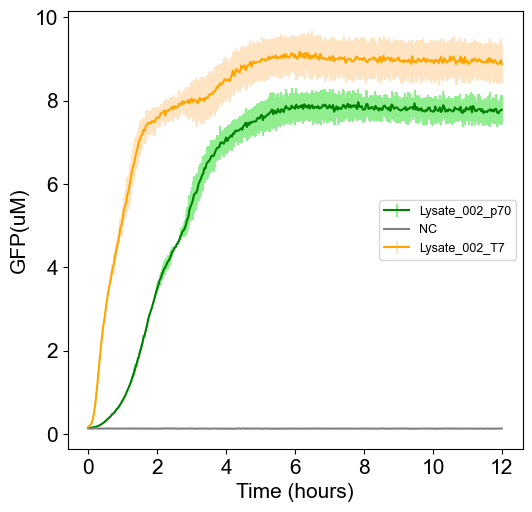

In [107]:
# 3. Plot timeseries
# 3.1 Define global plot parameters
plt.close("all")
DPI=1200
figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'15','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
LINEWIDTH = 1.5
MARKERSIZE = 5

# 3.4 Call plots
f, ax=plt.subplots()
plt.subplots_adjust(left=0.2,bottom=0.2,right=0.75,top=0.95) # Set size of plot precisely


plt.errorbar(Time, data["sigma_mean"], color= 'green', yerr=data["STD_sigma"],ecolor='lightgreen', label="Lysate_002_p70");
plt.errorbar(Time, data["Negative Control"], color= 'grey', label="NC");
plt.errorbar(Time, data["T7_mean"], color='orange', yerr=data["STD_T7"], ecolor='bisque', label="Lysate_002_T7");
#plt.errorbar(Time, data["16"], color= 'red', yerr=data["20"], ecolor='lightcoral', label="PUREΔCK + ESΔCP (nc)");

plt.ylabel('GFP(uM)')
plt.xlabel('Time (hours)')
plt.legend(loc=7, prop={'size': 9})
plt.savefig('./Lysate_002_p70_T7_GFP.png',dpi=DPI,transparent=True, bbox_inches='tight')
plt.show